In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("DATA/Robust_Scaler_result.csv",encoding="cp949")

In [3]:
data.head()

,CUSTNO,GNO,CBSCORE,CBSCOREGRD,CREDITOTAMT,YSALEAMT,ESTMM,ASSETAMT,IMSAAMT,IMJUAMT,...,환율,GDP,소상공인체감지수,실업률,물가지수,국고채,금리,유가등락률,소비자심리지수,ONEHOT
0,475821,l180202101898,1.015873,1,0.230769,10.743169,0.014085,10,0.0,0.0,...,0.009592,1.885958,51.4,0.000000,1.724868,-1.256410,-4.0,1.750600,0.798246,3
1,74417,l230201700120,0.206349,2,0.205128,6.027322,-0.380282,25,-0.5,25.0,...,0.537170,-0.901805,53.8,0.666667,-0.640212,-0.307692,-1.0,1.100719,-0.596491,8
2,387787,l110201603233,0.396825,1,-0.282051,3.775956,2.098592,10,0.0,0.0,...,0.978417,-1.182547,72.6,0.000000,-1.417989,-0.461538,-1.0,0.110312,-0.482456,7
3,395418,l230201700254,0.000000,2,0.076923,3.562842,-0.352113,10,0.0,0.0,...,0.520384,-0.901805,76.2,-0.333333,-0.677249,-0.205128,-1.0,0.429257,-0.394737,3
4,190372,l200201601418,-2.476190,6,-0.102564,1.437158,1.845070,80,-0.4,0.0,...,0.446043,-1.357134,63.2,-0.333333,-1.867725,-1.461538,-1.0,-0.618705,-0.017544,7


In [4]:
data.columns

Index(['CUSTNO', 'GNO', 'CBSCORE', 'CBSCOREGRD', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'GKIND', 'BIZNML_x', 'LABORCNT', 'ACTCD', 'ACTKND',
       'KOSPI', '환율', 'GDP', '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수', 'ONEHOT'],
      dtype='object')

In [5]:
features = data[[ 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'IMSAAMT', 'IMJUAMT',  'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'KOSPI', '환율', 'GDP', 
       '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수','ONEHOT']] #GKIND 갖고 가나요?.. 아뇨..ㅋㅋㅋ
act = data['ACTCD'] 

In [7]:
act = act-1

In [9]:
act = act * -1

#BorderlineSMOTE 기법 활용

In [10]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split

In [11]:

train_x, test_x,train_y, test_y = train_test_split(features, act,
stratify=act,train_size=0.7,test_size=0.3,random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(27381, 19) (11736, 19) (27381,) (11736,)


In [12]:
sm = BorderlineSMOTE(random_state=42)
over_train_x, over_train_y = sm.fit_resample(train_x,train_y)
'''
over_train_x : 학습용 독립변수
over_train_y : 학습용 종속변수
'''

'\nover_train_x : 학습용 독립변수\nover_train_y : 학습용 종속변수\n'

In [13]:
from sklearn.neighbors import KNeighborsClassifier

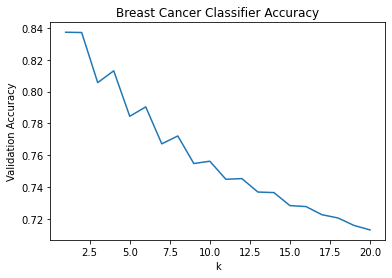

0.837252897068848


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_BOST = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='distance')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y,)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    matrix_kd_tree_uniform_BOST.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [16]:
sorted(matrix_kd_tree_uniform_BOST,key= lambda x: x[3],reverse=True)

[(1,
  0.9371879368883563,
  0.8798987436714795,
  0.9076402321083171,
  0.6460241381908799,
  0.837252897068848,
  array([[ 441,  629],
         [1281, 9385]], dtype=int64)),
 (2,
  0.9373501199040767,
  0.8795237202325146,
  0.9075166876269711,
  0.6467712059106498,
  0.8370824812542604,
  array([[ 443,  627],
         [1285, 9381]], dtype=int64)),
 (4,
  0.9408825978351374,
  0.8475529720607538,
  0.891782578672191,
  0.6583559252827134,
  0.8130538513974097,
  array([[ 502,  568],
         [1626, 9040]], dtype=int64)),
 (3,
  0.9408053832404584,
  0.8389274329645603,
  0.8869504881796104,
  0.6563796043327474,
  0.8056407634628494,
  array([[ 507,  563],
         [1718, 8948]], dtype=int64)),
 (6,
  0.9422289286484156,
  0.8196137258578661,
  0.8766546329723224,
  0.6593395732093069,
  0.7903885480572597,
  array([[ 534,  536],
         [1924, 8742]], dtype=int64)),
 (5,
  0.9420841030098881,
  0.8128633039564973,
  0.8727162917107051,
  0.6573662314175011,
  0.7845092024539877,
  

In [21]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 1,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))


              precision    recall  f1-score   support

        사고보증       0.26      0.41      0.32      1070
        정상보증       0.94      0.88      0.91     10666

    accuracy                           0.84     11736
   macro avg       0.60      0.65      0.61     11736
weighted avg       0.88      0.84      0.85     11736



# Edited Nearest Neighbours

In [22]:
from imblearn.under_sampling import EditedNearestNeighbours

In [23]:
enn = EditedNearestNeighbours()
over_train_x,over_train_y = enn.fit_resample(train_x,train_y)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

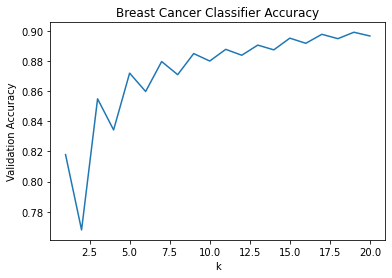

0.8990286298568507


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_ENN = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ENN.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [27]:
matrix_kd_tree_uniform_ENN

[(1,
  0.9365339338724536,
  0.8577723607725483,
  0.89542451676046,
  0.6391665542180498,
  0.8179107021131561,
  array([[ 450,  620],
         [1517, 9149]], dtype=int64)),
 (2,
  0.9416212609807628,
  0.7939246202887681,
  0.861488376824864,
  0.6516352073406457,
  0.7679788684389911,
  array([[ 545,  525],
         [2198, 8468]], dtype=int64)),
 (3,
  0.9281551542944492,
  0.9108381773860866,
  0.9194151327308001,
  0.6040172195341649,
  0.854890933878664,
  array([[ 318,  752],
         [ 951, 9715]], dtype=int64)),
 (4,
  0.9319465081723626,
  0.8820551284455278,
  0.9063147247242425,
  0.6199995268395864,
  0.8342706203135651,
  array([[ 383,  687],
         [1258, 9408]], dtype=int64)),
 (5,
  0.9222969858973177,
  0.9381211325707857,
  0.930141761561701,
  0.5751353326405331,
  0.8719325153374233,
  array([[  227,   843],
         [  660, 10006]], dtype=int64)),
 (6,
  0.9251508295625943,
  0.9201200075004687,
  0.9226285606844035,
  0.5890319663670568,
  0.8597477845944104,
 

In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.23      0.42      0.30      1070
        정상보증       0.94      0.86      0.90     10666

    accuracy                           0.82     11736
   macro avg       0.58      0.64      0.60     11736
weighted avg       0.87      0.82      0.84     11736



In [29]:
from imblearn.over_sampling import ADASYN


In [30]:
ADA = ADASYN(random_state=42,)
over_train_x,over_train_y = ADA.fit_resample(train_x,train_y)
from sklearn.neighbors import KNeighborsClassifier

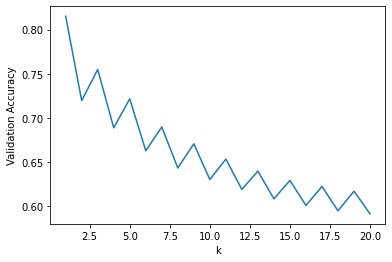

0.8151840490797546


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_ADA = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ADA.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [32]:
matrix_kd_tree_uniform_ADA

[(1,
  0.936594389065872,
  0.8544909056816051,
  0.8936608324753641,
  0.6389276958314567,
  0.8151840490797546,
  array([[ 453,  617],
         [1552, 9114]], dtype=int64)),
 (2,
  0.9411271987555343,
  0.7373898368648041,
  0.8268937601850392,
  0.6387883763763273,
  0.7194103612815269,
  array([[ 578,  492],
         [2801, 7865]], dtype=int64)),
 (3,
  0.9402985074626866,
  0.7796737296081006,
  0.8524859046642748,
  0.6431078928414334,
  0.7547716428084527,
  array([[ 542,  528],
         [2350, 8316]], dtype=int64)),
 (4,
  0.9435657345311906,
  0.6991374460903806,
  0.803166567935807,
  0.6411575080919193,
  0.6885650988411725,
  array([[ 624,  446],
         [3209, 7457]], dtype=int64)),
 (5,
  0.9430933269438121,
  0.7380461278829927,
  0.8280650081523169,
  0.6470604471190665,
  0.7214553510565781,
  array([[ 595,  475],
         [2794, 7872]], dtype=int64)),
 (6,
  0.9443339960238568,
  0.668010500656291,
  0.782494096974356,
  0.6377435680851548,
  0.6624914792092707,
  ar

In [33]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.23      0.43      0.30      1070
        정상보증       0.94      0.85      0.89     10666

    accuracy                           0.82     11736
   macro avg       0.58      0.64      0.60     11736
weighted avg       0.87      0.82      0.84     11736



In [34]:
from imblearn.combine import SMOTEENN

SMT = SMOTEENN(random_state=42)
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

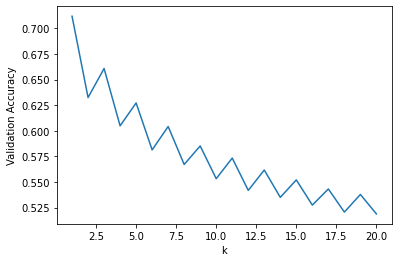

0.711826857532379


In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_SMTEN = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_SMTEN.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [38]:
matrix_kd_tree_uniform_SMTEN

[(1,
  0.941990291262136,
  0.727732983311457,
  0.8211149899502803,
  0.6405020056744201,
  0.711826857532379,
  array([[ 592,  478],
         [2904, 7762]], dtype=int64)),
 (2,
  0.9458169567658619,
  0.6317269829364335,
  0.7575042158516019,
  0.6354896596925159,
  0.6324130879345603,
  array([[ 684,  386],
         [3928, 6738]], dtype=int64)),
 (3,
  0.9454884712781554,
  0.6651040690043127,
  0.7808905278221145,
  0.6414305391750537,
  0.6607873210633947,
  array([[ 661,  409],
         [3572, 7094]], dtype=int64)),
 (4,
  0.9458579881656805,
  0.5994749671854491,
  0.7338459772753357,
  0.628709446209547,
  0.6048057259713702,
  array([[ 704,  366],
         [4272, 6394]], dtype=int64)),
 (5,
  0.9460992907801419,
  0.6253515844740296,
  0.7529916459697449,
  0.6351056987790709,
  0.6271301976823449,
  array([[ 690,  380],
         [3996, 6670]], dtype=int64)),
 (6,
  0.9486739469578783,
  0.5701293830864429,
  0.7122276879831341,
  0.631326373786212,
  0.5812883435582822,
  arr

In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.17      0.55      0.26      1070
        정상보증       0.94      0.73      0.82     10666

    accuracy                           0.71     11736
   macro avg       0.56      0.64      0.54     11736
weighted avg       0.87      0.71      0.77     11736



In [39]:
from imblearn.combine import SMOTETomek

SMT = SMOTETomek(random_state=42)
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

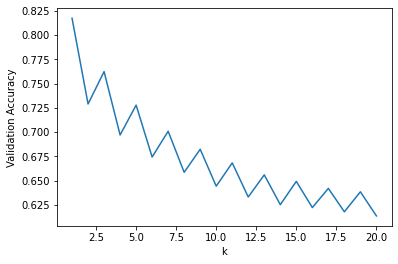

0.8174846625766872


In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_SMTTK = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_SMTTK.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [41]:
matrix_kd_tree_uniform_SMTTK

[(1,
  0.9362333674513817,
  0.8575848490530659,
  0.8951849677040516,
  0.6376709291994301,
  0.8174846625766872,
  array([[ 447,  623],
         [1519, 9147]], dtype=int64)),
 (2,
  0.9417040358744395,
  0.748171760735046,
  0.8338557993730409,
  0.6432447588721959,
  0.7290388548057259,
  array([[ 576,  494],
         [2686, 7980]], dtype=int64)),
 (3,
  0.9401117318435754,
  0.7888618038627414,
  0.8578711256117455,
  0.6439636122117446,
  0.7624403544648943,
  array([[ 534,  536],
         [2252, 8414]], dtype=int64)),
 (4,
  0.9414028553693358,
  0.7109506844177761,
  0.8101062977405054,
  0.6349145945453367,
  0.6970858895705522,
  array([[ 598,  472],
         [3083, 7583]], dtype=int64)),
 (5,
  0.9416075650118203,
  0.7468591786986687,
  0.8330021959636098,
  0.6425884678540073,
  0.7278459441036128,
  array([[ 576,  494],
         [2700, 7966]], dtype=int64)),
 (6,
  0.9423474663908997,
  0.6834802175135946,
  0.7923051842191066,
  0.6333288938035262,
  0.6743353783231084,
 

In [42]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.23      0.42      0.30      1070
        정상보증       0.94      0.86      0.90     10666

    accuracy                           0.82     11736
   macro avg       0.58      0.64      0.60     11736
weighted avg       0.87      0.82      0.84     11736



In [43]:
from imblearn.under_sampling import TomekLinks


In [44]:
ADA = TomekLinks()
over_train_x,over_train_y = ADA.fit_resample(train_x,train_y)
from sklearn.neighbors import KNeighborsClassifier

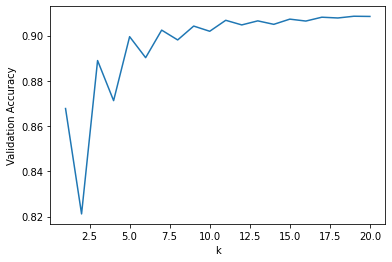

0.9085719154737559


In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_Tomek = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ADA.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [46]:
sorted(matrix_kd_tree_uniform_ADA,key=lambda x: x[3],reverse=True)

[(19,
  0.9093624647947427,
  0.9989686855428465,
  0.9520618326408435,
  0.5032226605284326,
  0.9085719154737559,
  array([[    8,  1062],
         [   11, 10655]], dtype=int64)),
 (20,
  0.9094945355191257,
  0.9986874179636227,
  0.9520064348914112,
  0.5040166061780731,
  0.9084867075664622,
  array([[   10,  1060],
         [   14, 10652]], dtype=int64)),
 (17,
  0.9095335725269093,
  0.9982186386649166,
  0.9518147684605758,
  0.5042495062483461,
  0.908145875937287,
  array([[   11,  1059],
         [   19, 10647]], dtype=int64)),
 (18,
  0.9095726495726496,
  0.9977498593662104,
  0.951622999195207,
  0.5044824063186193,
  0.9078050443081118,
  array([[   12,  1058],
         [   24, 10642]], dtype=int64)),
 (15,
  0.909666381522669,
  0.9969998124882805,
  0.9513329754875649,
  0.5050419623189066,
  0.907293796864349,
  array([[   14,  1056],
         [   32, 10634]], dtype=int64)),
 (11,
  0.9110271384403985,
  0.9945621601350084,
  0.9509636934110264,
  0.513168930534794,
 

In [47]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.30      0.35      0.33      1070
        정상보증       0.93      0.92      0.93     10666

    accuracy                           0.87     11736
   macro avg       0.62      0.64      0.63     11736
weighted avg       0.88      0.87      0.87     11736



In [27]:
sorted(matrix_kd_tree_uniform_BOST,key=lambda x: x[3],reverse=True)

[(2,
  0.25,
  0.33084112149532713,
  0.28479485116653264,
  0.6156361992250684,
  0.8485003408316292,
  array([[9604, 1062],
         [ 716,  354]], dtype=int64)),
 (1,
  0.22892938496583143,
  0.37570093457943926,
  0.28450106157112526,
  0.6243777502449044,
  0.8277096114519428,
  array([[9312, 1354],
         [ 668,  402]], dtype=int64)),
 (3,
  0.194843617920541,
  0.4308411214953271,
  0.26833527357392317,
  0.6261181043441384,
  0.7857873210633947,
  array([[8761, 1905],
         [ 609,  461]], dtype=int64)),
 (4,
  0.20152091254752852,
  0.39626168224299063,
  0.26717076244486454,
  0.6193759189388588,
  0.8018064076346285,
  array([[8986, 1680],
         [ 646,  424]], dtype=int64)),
 (5,
  0.17957872188504106,
  0.4700934579439252,
  0.2598811676569362,
  0.627321246129285,
  0.755879345603272,
  array([[8368, 2298],
         [ 567,  503]], dtype=int64)),
 (8,
  0.17663421418636996,
  0.4747663551401869,
  0.2574759249873289,
  0.6263762396364726,
  0.7503408316291752,
  arra

In [28]:
sorted(matrix_kd_tree_uniform_ENN,key=lambda x: x[3],reverse=True)

[(1,
  0.21263791374122368,
  0.39626168224299063,
  0.27676240208877284,
  0.6245324912246267,
  0.8111792774369462,
  array([[9096, 1570],
         [ 646,  424]], dtype=int64)),
 (3,
  0.24003067484662577,
  0.2925233644859813,
  0.2636899747262005,
  0.5998056537412092,
  0.8510565780504431,
  array([[9675,  991],
         [ 757,  313]], dtype=int64)),
 (2,
  0.2698412698412698,
  0.22242990654205608,
  0.24385245901639344,
  0.5810255664343508,
  0.8742331288343558,
  array([[10022,   644],
         [  832,   238]], dtype=int64)),
 (5,
  0.2583783783783784,
  0.22336448598130842,
  0.23959899749373437,
  0.579523983099411,
  0.8707396046353102,
  array([[9980,  686],
         [ 831,  239]], dtype=int64)),
 (4,
  0.2757078986587183,
  0.17289719626168223,
  0.21252153934520387,
  0.5636659242137213,
  0.8831799591002045,
  array([[10180,   486],
         [  885,   185]], dtype=int64)),
 (7,
  0.26384839650145775,
  0.1691588785046729,
  0.2061503416856492,
  0.560906084667675,
  0.8

In [29]:
sorted(matrix_kd_tree_uniform_ADA,key=lambda x: x[3],reverse=True)

[(1,
  0.20742884708152437,
  0.40186915887850466,
  0.2736239261851734,
  0.6239141406618287,
  0.8054703476482618,
  array([[9023, 1643],
         [ 640,  430]], dtype=int64)),
 (2,
  0.2213785046728972,
  0.3542056074766355,
  0.27246585190510425,
  0.6146145232207854,
  0.8275391956373551,
  array([[9333, 1333],
         [ 691,  379]], dtype=int64)),
 (4,
  0.18720565149136578,
  0.4457943925233645,
  0.263681592039801,
  0.6258130034996346,
  0.7730061349693251,
  array([[8595, 2071],
         [ 593,  477]], dtype=int64)),
 (6,
  0.1696911811524992,
  0.4981308411214953,
  0.25314652101638563,
  0.6268077794581787,
  0.7320211315610089,
  array([[8058, 2608],
         [ 537,  533]], dtype=int64)),
 (3,
  0.17276770441327402,
  0.4719626168224299,
  0.25294264963686447,
  0.6226304739840632,
  0.7458248125426039,
  array([[8248, 2418],
         [ 565,  505]], dtype=int64)),
 (10,
  0.159457384182237,
  0.5822429906542056,
  0.25035161744022505,
  0.6371743736319969,
  0.68208929788

In [30]:
sorted(matrix_kd_tree_uniform_SMTEN,key=lambda x: x[3],reverse=True)

[(2,
  0.1716886377903327,
  0.5112149532710281,
  0.2570488721804511,
  0.631896619706956,
  0.7305725971370143,
  array([[8027, 2639],
         [ 523,  547]], dtype=int64)),
 (1,
  0.16543280182232345,
  0.5429906542056074,
  0.25360104757747703,
  0.6340961146520255,
  0.7085889570552147,
  array([[7735, 2931],
         [ 489,  581]], dtype=int64)),
 (4,
  0.15611492499364352,
  0.5738317757009346,
  0.24545272836298218,
  0.6313280386098897,
  0.6783401499659168,
  array([[7347, 3319],
         [ 456,  614]], dtype=int64)),
 (6,
  0.15194746376811594,
  0.6271028037383177,
  0.24462267590229672,
  0.6379935545036985,
  0.6468984321745058,
  array([[6921, 3745],
         [ 399,  671]], dtype=int64)),
 (3,
  0.15218951902368988,
  0.594392523364486,
  0.24233187273766432,
  0.6311077561506473,
  0.6611281526925699,
  array([[7123, 3543],
         [ 434,  636]], dtype=int64)),
 (5,
  0.14870689655172414,
  0.6448598130841121,
  0.24168126094570927,
  0.6372620835531192,
  0.6310497614

In [31]:
sorted(matrix_kd_tree_uniform_SMTTK,key=lambda x: x[3],reverse=True)

[(2,
  0.2303951367781155,
  0.3542056074766355,
  0.2791896869244936,
  0.6177553445221168,
  0.8332481254260395,
  array([[9400, 1266],
         [ 691,  379]], dtype=int64)),
 (1,
  0.20854021847070506,
  0.3925233644859813,
  0.2723735408560311,
  0.6215382620292272,
  0.8087934560327198,
  array([[9072, 1594],
         [ 650,  420]], dtype=int64)),
 (4,
  0.18619844834626378,
  0.4261682242990654,
  0.2591645353793692,
  0.6196563979173932,
  0.7778629856850716,
  array([[8673, 1993],
         [ 614,  456]], dtype=int64)),
 (10,
  0.16671214188267394,
  0.5710280373831775,
  0.258078141499472,
  0.6423488208667247,
  0.7006646216768916,
  array([[7612, 3054],
         [ 459,  611]], dtype=int64)),
 (6,
  0.17263298762127802,
  0.4822429906542056,
  0.254249815225425,
  0.6251923747570671,
  0.7420756646216768,
  array([[8193, 2473],
         [ 554,  516]], dtype=int64)),
 (3,
  0.1752136752136752,
  0.45981308411214955,
  0.2537390407426508,
  0.621337256475726,
  0.753408316291751